In [5]:
# import os,sys
# from google.colab import drive
# drive.mount('/content/MyDrive')
# nb_path = '/content/notebooks'
# os.symlink('/content/MyDrive/My Notebooks/Colab Notebooks', nb_path)
# sys.path.insert(0,nb_path)

# **Download Java**

In [6]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#  **Install Apache Spark 3.0.1 with Hadoop 2.7**

In [8]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# **Unzip Folder**

In [9]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# **Install Find Spark**

> It will locate Spark on the system and import it as a regular library.



In [10]:
!pip install -q findspark

# **Settin up Envirnmental Variables**


> This will enable us to run Pyspark in the Colab environment.



In [11]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [12]:
import findspark
findspark.init()

In [13]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

# **Loading data to PySpark**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as f

**TASK 06 : The number of accidents which occur due to traffic violations based on vehicle type.** 

In [16]:
# Load data to Task 06.
df_task1 = spark.read.csv('/content/sample_data/tf.csv',header=True)
df_task1.show()

+------------+------------+------+--------------------+--------------------+--------------------+-----------+------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+--------------------+----+----------+----------+----------+--------------+----------+--------------------+-----------------------+--------+------+------------------+------------+--------+--------------------+--------------------+
|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|            Location|   Latitude|   Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|         VehicleType|Year|      Make|     Model|     Color|Violation Type|    Charge|             Article|Contributed To Accident|    Race|Gender|       Driver City|Driver State|DL State|         Arrest Type|         Geolocation|
+------------+------------+------+------------------

**Schema of DataFrame**

Shows data type and the nullable conditions for that particular column.

In [17]:
df_task1.printSchema()

root
 |-- Date Of Stop: string (nullable = true)
 |-- Time Of Stop: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- SubAgency: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Accident: string (nullable = true)
 |-- Belts: string (nullable = true)
 |-- Personal Injury: string (nullable = true)
 |-- Property Damage: string (nullable = true)
 |-- Fatal: string (nullable = true)
 |-- Commercial License: string (nullable = true)
 |-- HAZMAT: string (nullable = true)
 |-- Commercial Vehicle: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Work Zone: string (nullable = true)
 |-- State: string (nullable = true)
 |-- VehicleType: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Violati

**Describing a Particular**

Summary of any particular column of a DataFrame.Gives statistical summary of the given column, if not specified, it provides the statistical summary of the DataFrame.

In [18]:
df_task1.describe().show()
#fifa_df.describe('Position').show()

+-------+------------+------------+------+--------------------+--------------------+------------------+------------------+------------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+---------------+------------------+----+-----+-----+--------------+---------+--------------------+-----------------------+-----+------+------------+------------+--------+-----------------+--------------------+
|summary|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|          Location|          Latitude|         Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|    VehicleType|              Year|Make|Model|Color|Violation Type|   Charge|             Article|Contributed To Accident| Race|Gender| Driver City|Driver State|DL State|      Arrest Type|         Geolocation|
+-------+------------+------------+------+------------

Selecting Multiple Columns

In [19]:
# Remove null values
df_task1.dropna(subset=["VehicleType"])

df_task1.show()

+------------+------------+------+--------------------+--------------------+--------------------+-----------+------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+--------------------+----+----------+----------+----------+--------------+----------+--------------------+-----------------------+--------+------+------------------+------------+--------+--------------------+--------------------+
|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|            Location|   Latitude|   Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|         VehicleType|Year|      Make|     Model|     Color|Violation Type|    Charge|             Article|Contributed To Accident|    Race|Gender|       Driver City|Driver State|DL State|         Arrest Type|         Geolocation|
+------------+------------+------+------------------

In [20]:
df_task1.select('VehicleType','Contributed To Accident').show()

+--------------------+-----------------------+
|         VehicleType|Contributed To Accident|
+--------------------+-----------------------+
|08 - Recreational...|                    Yes|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|          19 - Moped|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|05 - Light Duty T...|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Automobile|                     No|
|     02 - Au

+--------------------+-----------------------+-------------------+
|         VehicleType|Contributed To Accident|Number of Accidents|
+--------------------+-----------------------+-------------------+
|          19 - Moped|                     No|                  1|
|08 - Recreational...|                    Yes|                  1|
|     02 - Automobile|                     No|                 24|
|05 - Light Duty T...|                     No|                  1|
+--------------------+-----------------------+-------------------+



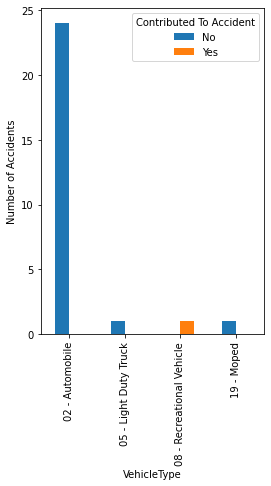

In [30]:
# Group data from Vehicle type.
group_data = df_task1.groupby(["VehicleType","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

# Dipaly Data
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="VehicleType",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(4, 6)

# Change the axes labels
ax.set_xlabel("VehicleType")
ax.set_ylabel("Number of Accidents")

# Visualize the data
plt.show()




**TASK 15 : The correlation between accidents and time of the day.**